In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

c:\Users\Ourba\Desktop\10Academy\news_correlation_10ac_week0\notebooks


In [2]:
#Loading Csv files into a panadas dataframe
rating = "../data/rating.csv"
traffic = "../data/traffic.csv"
domain="../data/domains_location.csv"



df_r=pd.read_csv(rating)
df_t=pd.read_csv(traffic)
df_d=pd.read_csv(domain)

df_r.dropna(subset=['source_name'], inplace=True)

In [3]:
#TASK 1
#Data exploaration for top and bottom ten website with most articles
website_count=df_r['source_name'].value_counts().reset_index()
website_count.columns=["source_name","article_count"]


#separate top 10 and bottom 10
top_10=website_count.sort_values(by='article_count',ascending=False ).head(10)
print(top_10[['source_name','article_count']])

bottom_10=website_count.sort_values(by='article_count',ascending=False ).tail(10)
print(bottom_10[['source_name','article_count']])


          source_name  article_count
0      ETF Daily News          16746
1  The Times of India           7504
2       GlobeNewswire           5423
3  Globalsecurity.org           3119
4              Forbes           2784
5            BBC News           2113
6            ABC News           2058
7    Business Insider           2034
8           The Punch           1800
9  Al Jazeera English           1664
                    source_name  article_count
19                          CNA            674
20                         Time            600
21              Android Central            522
22                  Gizmodo.com            388
23                    ReadWrite            324
24                     Euronews            286
25                        Wired            270
26                          CNN            267
27                    The Verge            214
28  AllAfrica - Top Africa News             20


C:\Users\Ourba\AppData\Local\Temp\ipykernel_12592\3362085129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='source_name', data=top_10, palette='Blues')


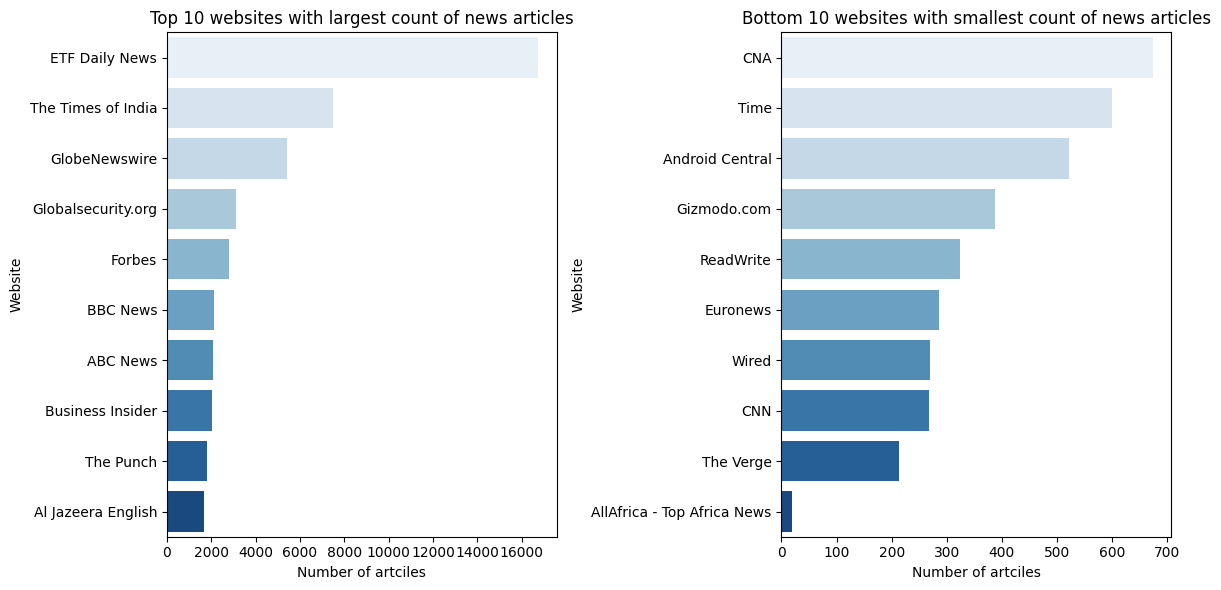

In [4]:
# Visualization
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='article_count', y='source_name', data=top_10, palette='Blues')
plt.title('Top 10 websites with largest count of news articles')
plt.xlabel('Number of artciles')
plt.ylabel('Website')

# Bottom 10
plt.subplot(1, 2, 2)
sns.barplot(x='article_count', y='source_name',  data=bottom_10, palette='Blues', hue='source_name' ,legend=False)
plt.title('Bottom 10 websites with smallest count of news articles')
plt.xlabel('Number of artciles')
plt.ylabel('Website')

plt.tight_layout()
plt.show()

In [5]:
# Websites with the highest numbers of visitors traffic 
df_t.dropna(subset=['Domain', 'GlobalRank'], inplace=True)

top_traffic_websites = df_t.head(10)

print(top_traffic_websites[['Domain', 'GlobalRank']])

                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10


C:\Users\Ourba\AppData\Local\Temp\ipykernel_12592\1930914083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites, palette='Blues_d')


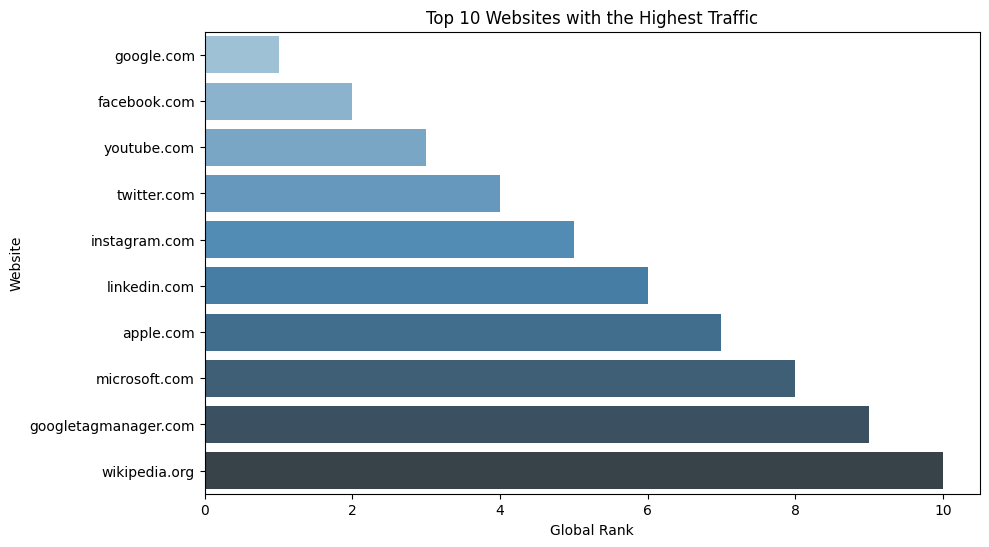

In [6]:
#visuliazation 
plt.figure(figsize=(10, 6))
sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites, palette='Blues_d')

plt.xlabel('Global Rank')
plt.ylabel('Website')
plt.title('Top 10 Websites with the Highest Traffic')
plt.show()

In [7]:
#Countries with the highest number of news media organisations (represented by domains in the data)

df_d.dropna(subset=['Country', 'SourceCommonName'], inplace=True)

domain_count=df_d.groupby('Country').size().reset_index(name='Count of Domains')
domain_count=domain_count.sort_values(by='Count of Domains',ascending=False)
print(domain_count.head(10))


            Country  Count of Domains
214   United States             14111
213  United Kingdom              1950
97            Italy              1810
67           France              1041
166          Russia              1024
36           Canada               887
72          Germany               884
42            China               780
206          Turkey               725
90            India               686


C:\Users\Ourba\AppData\Local\Temp\ipykernel_12592\1342086674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count of Domains', data=domain_count.head(10),palette='Blues')


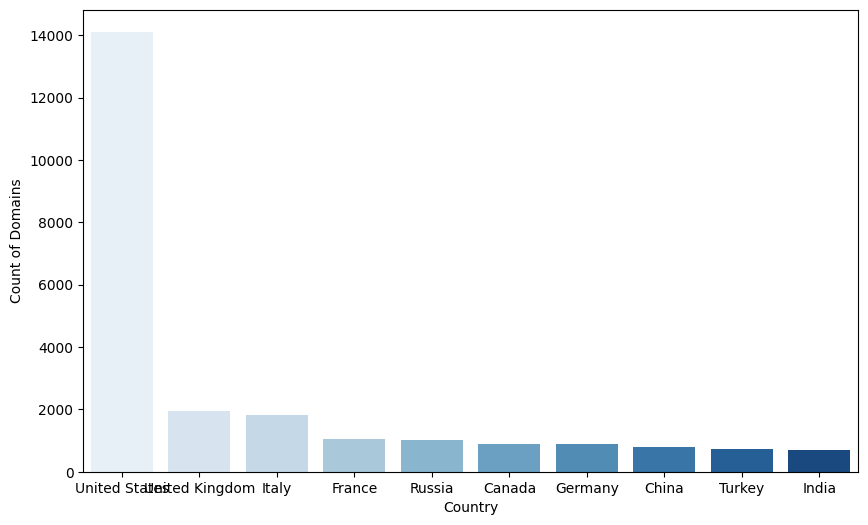

In [8]:
#visulazation
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Count of Domains', data=domain_count.head(10),palette='Blues')
plt.show()


In [9]:
#Countries that have many articles written about them - the content of the news is about that country
#we must merge the rating dataframe and domains location dataframe on the source name and source common name columns respectively
import pycountry

def extract_countries(text):
    if not isinstance(text, str):
        return ''
    
    countries = []
    for country in pycountry.countries:
        if country.name.lower() in text.lower():
            countries.append(country.name)
    return ', '.join(countries)

df_r['countries'] = df_r['category'].apply(extract_countries)

# Count occurrences of each country
content_count = df_r['countries'].str.split(', ').explode().value_counts().reset_index()
content_count.columns = ['country', 'content count']

# Remove empty string from the dataframe
content_count = content_count[content_count['country'] != '']
print(content_count.head(10))


           country  content count
1           Canada           2066
2            India           1054
3        Australia            877
4   United Kingdom            753
5            Niger            605
6          Ukraine            577
7           Mexico            553
8    United States            481
9          Nigeria            469
10         Germany            459


In [10]:
#Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.

# Dictionary to map countries to regions
region_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'US': ['United States'],
    'China': ['China'],
    'EU': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
}



In [11]:
# Map Countries to Regions and Create a New Column in the Merged DataFrame
def map_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'

df_r['Region'] = df_r['countries'].apply(map_region)

# Count the Number of Unique Websites per Region
region_count = df_r.groupby('Region')['source_name'].nunique().reset_index(name='website_count')
print(region_count)



        Region  website_count
0       Africa             27
1        China             22
2           EU             28
3  Middle East             27
4        Other             29
5           US             24
6      Ukraine             19


In [12]:
#Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance
merged_df = pd.merge(df_r, df_t, 
                     left_on=df_r['source_name'].str.strip().str.split('.').str[0].str.lower(), 
                     right_on=df_t['Domain'].str.strip().str.split('.').str[0].str.lower(), 
                     how='inner')

sentiment_counts = merged_df.groupby('source_name')['title_sentiment'].value_counts().unstack(fill_value=0)
# print(merged_df[["source_name", "Domain","title_sentiment"]])
print(sentiment_counts.head(10))


title_sentiment     Negative  Neutral  Positive
source_name                                    
CNA                     1764     6468      1204
CNN                      714      994       161
Deadline                  84      794        54
Euronews                 570      785        75
Forbes                  5400    48325     15875
Gizmodo.com              760     2530       590
Globalsecurity.org       747     2255       117
GlobeNewswire             27     4491       905
Marketscreener.com        42     1167       153
NPR                      837     1851       255


In [13]:
#websites with the most negative sentiments
import sys
sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\news_correlation_10ac_week0\\src')
from utils import calculate_sentiment_stats
# Calculate aggregate statistics and top sentiments using the utility function
agg_stats, top_sentiments = calculate_sentiment_stats(merged_df)

print(top_sentiments['negative'])


          source_name  Negative Count
0              Forbes            5400
1                Time            2960
2                  RT            2015
3                 CNA            1764
4                 NPR             837
5         Gizmodo.com             760
6  Globalsecurity.org             747
7                 CNN             714
8            Euronews             570
9               Wired             390


In [14]:
#websites with the most postive sentiments
print(top_sentiments['positive'])

          source_name  Positive Count
0              Forbes           15875
1                 CNA            1204
2       GlobeNewswire             905
3         Gizmodo.com             590
4                Time             528
5               Wired             402
6                 NPR             255
7                 CNN             161
8  Marketscreener.com             153
9            Phys.Org             143


In [15]:
#websites with the most neutral sentiments
print(top_sentiments['neutral'])

          source_name  Neutral Count
0              Forbes          48325
1                 CNA           6468
2                Time           6112
3       GlobeNewswire           4491
4                  RT           3490
5         Gizmodo.com           2530
6  Globalsecurity.org           2255
7                 NPR           1851
8  Marketscreener.com           1167
9                 CNN            994


In [16]:

print(agg_stats)

title_sentiment      Negative       Neutral      Positive
mean             1.108800e+03  5.409467e+03  1.377800e+03
median           7.140000e+02  1.851000e+03  1.610000e+02
var              2.111899e+06  1.448465e+08  1.619842e+07


In [17]:
#TASK 2 
# TF-IDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
import pandas as pd
sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\news_correlation_10ac_week0\\src')
import importlib
import utils
importlib.reload(utils)
from utils import preprocess_text

df_r["clean_title"] = df_r["title"].apply(preprocess_text)
df_r["clean_content"] = df_r["content"].apply(preprocess_text)

# TF-IDF vectorization for title
tfidf_vectorizer_title = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix_title = tfidf_vectorizer_title.fit_transform(df_r["clean_title"])

# TF-IDF vectorization for content
tfidf_vectorizer_content = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix_content = tfidf_vectorizer_content.fit_transform(df_r["clean_content"])

# Keyword extraction and comparison
def extract_keywords(tfidf_matrix, feature_names):
    keywords = {}
    for i, row in enumerate(tfidf_matrix):
        # Get TF-IDF scores for the document
        tfidf_scores = {feature_names[idx]: score for idx, score in zip(row.indices, row.data)}
        # Sort keywords by TF-IDF score in descending order
        sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]
        keywords[df_r.iloc[i]["article_id"]] = [keyword for keyword, score in sorted_keywords]
    return keywords

feature_names_title = tfidf_vectorizer_title.get_feature_names_out()
feature_names_content = tfidf_vectorizer_content.get_feature_names_out()

keywords_title = extract_keywords(tfidf_matrix_title, feature_names_title)
keywords_content = extract_keywords(tfidf_matrix_content, feature_names_content)

# Compute cosine similarity between keywords in title and content
similarity_scores = {}
for article_id in df_r["article_id"]:
    keywords_title_set = set(keywords_title[article_id])
    keywords_content_set = set(keywords_content[article_id])
    similarity_score = len(keywords_title_set.intersection(keywords_content_set)) / len(keywords_title_set.union(keywords_content_set))
    similarity_scores[article_id] = similarity_score

# Convert similarity_scores dictionary to DataFrame for easier analysis and visualization
df_similarity = pd.DataFrame(list(similarity_scores.items()), columns=["article_id", "similarity_score"])
df_similarity = pd.merge(df_similarity, df_r[["article_id", "title", "content"]], on="article_id", how="inner")

print(df_similarity.head(10))
best_simlarity=df_similarity.sort_values(by="similarity_score", ascending=False).head(10)



   article_id  similarity_score  \
0       81664          0.090909   
1       81667          0.076923   
2       81694          0.071429   
3       81695          0.181818   
4       81703          0.076923   
5       81707          0.133333   
6       81717          0.000000   
7       81719          0.076923   
8       81723          0.333333   
9       81727          0.272727   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   
5  unga calls for humanitarian truce in israel-ha...   
6  malawi heatwave warning issued as temperatures...   
7  researcher scans tropical forest with mixed-re...   
8  ‘taylor swift: the eras tour’ movie: tickets, ...   
9  marine le pen found guilty of defamation after...  

C:\Users\Ourba\AppData\Local\Temp\ipykernel_12592\3135383161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_id', y='similarity_score', data=best_simlarity, palette='Blues')


Text(0, 0.5, 'similarity index')

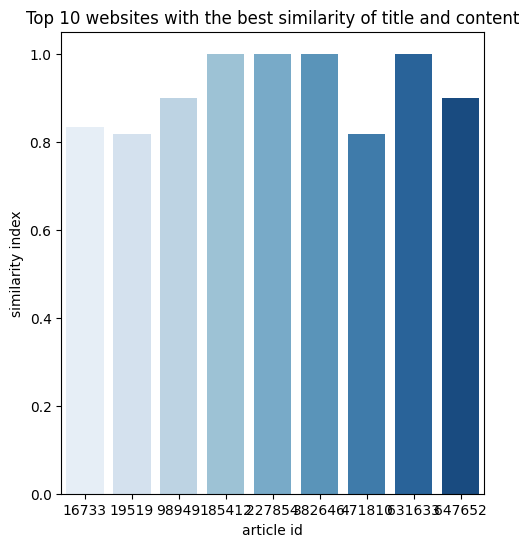

In [18]:
# Visualization
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='article_id', y='similarity_score', data=best_simlarity, palette='Blues')
plt.title('Top 10 websites with the best similarity of title and content')
plt.xlabel('article id')
plt.ylabel('similarity index')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

df_r.dropna(subset=['clean_title', 'category'], inplace=True)
X = df_r['clean_title']
y = df_r['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Train Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate classifier
# print(classification_report(y_test, y_pred))

# Reset the index of df_r
df_r.reset_index(drop=True, inplace=True)

# Predict categories for df_r articles
predicted_categories_df_r = clf.predict(tfidf_vectorizer.transform(df_r["clean_title"]))

# Add predicted categories to df_r
df_r["predicted_category"] = predicted_categories_df_r

# Display first few rows of df_r with predicted categories
print(df_r[["title", "predicted_category"]].head(10))

                                               title predicted_category
0  superstar chef yannick alléno brings refined f...             Travel
1  nice claim top spot in ligue 1 with late win a...             Health
2  amphibians are the world’s most vulnerable spe...            Climate
3              image: rusty red waters in madagascar             Health
4  everything leaving max (formerly hbo max) in n...        Real estate
5  unga calls for humanitarian truce in israel-ha...             Health
6  malawi heatwave warning issued as temperatures...             Canada
7  researcher scans tropical forest with mixed-re...               News
8  ‘taylor swift: the eras tour’ movie: tickets, ...             Movies
9  marine le pen found guilty of defamation after...             Travel


In [40]:
# Which websites reported the most diverse topics?
diverse_website=df_r.groupby("source_name")["predicted_category"].nunique().reset_index(name ="number of topics")
diverse_website=diverse_website.sort_values(by="number of topics" , ascending=False).head(10)
print(diverse_website)


                     source_name  number of topics
25            The Times of India                58
0                       ABC News                50
17  International Business Times                49
13                        Forbes                47
1             Al Jazeera English                47
16                 GlobeNewswire                46
4                       BBC News                45
15            Globalsecurity.org                44
19                           NPR                40
21                            RT                39


C:\Users\Ourba\AppData\Local\Temp\ipykernel_12592\911706409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_name', y='number of topics', data=diverse_website, palette='Blues')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'The Times of India'),
  Text(1, 0, 'ABC News'),
  Text(2, 0, 'International Business Times'),
  Text(3, 0, 'Forbes'),
  Text(4, 0, 'Al Jazeera English'),
  Text(5, 0, 'GlobeNewswire'),
  Text(6, 0, 'BBC News'),
  Text(7, 0, 'Globalsecurity.org'),
  Text(8, 0, 'NPR'),
  Text(9, 0, 'RT')])

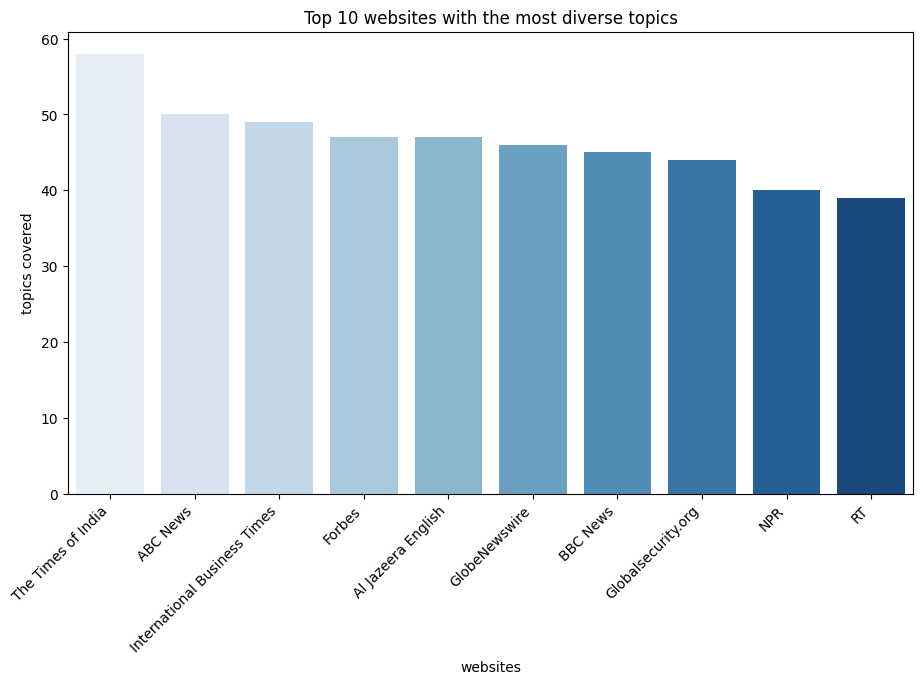

In [52]:
#visualization 
plt.figure(figsize=(24, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='source_name', y='number of topics', data=diverse_website, palette='Blues')
plt.title('Top 10 websites with the most diverse topics')
plt.xlabel('websites')
plt.ylabel('topics covered')
plt.xticks(rotation=45, ha='right')

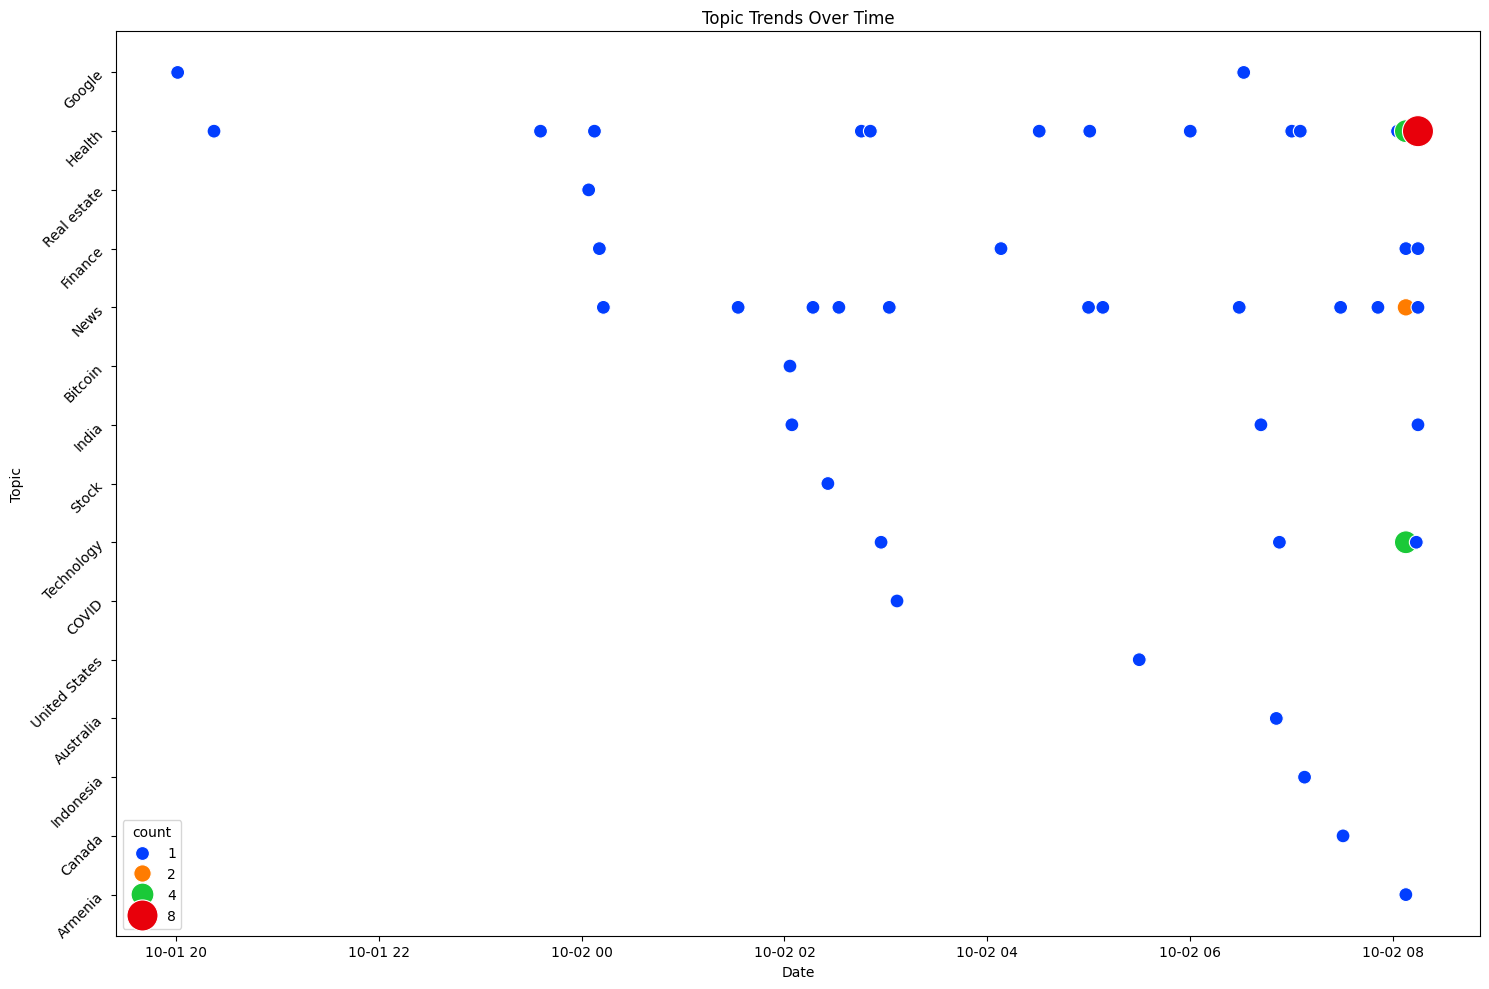

In [75]:
from datetime import datetime

topic_trends = df_r.groupby(['published_at', 'predicted_category']).size().reset_index(name='count')

# Convert 'published_at' to datetime format
topic_trends['published_at'] = pd.to_datetime(topic_trends['published_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')





# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(x='published_at', y='predicted_category', size='count', hue='count', sizes=(100, 500), palette="bright", data=topic_trends.head(50))

# Set labels and title
plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Topic')
plt.yticks(rotation=45)  
plt.tight_layout()

plt.show()